ANALISIS EXPLORATORIO DE DATOS

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

### LECTURA DEL DATASET

In [5]:
df = pd.read_parquet("DataSet_Final2.parquet")

#### Visualizacion del dataset cargado

In [20]:
df.tail(5)

,user_id,items_count,steam_id,item_name,playtime_forever,playtime_2weeks,item_id,recommend,review,Polaridad del sentimiento,Sentimiento,publisher,genres,title,price,developer,anio
6454903,76561198312638244,36,76561198312638244,DOOM,1178.0,0.0,70.0,True,a must have classic from steam definitely wort...,0.233333,2,Valve,Action,Half-Life,9.99,Valve,1998.0
6454904,76561198312638244,36,76561198312638244,DOOM,1178.0,0.0,362890.0,True,this game is a perfect remake of the original ...,0.142500,2,Crowbar Collective,"Action, Adventure, Indie, Early Access",Black Mesa,19.99,Crowbar Collective,2015.0
6454905,LydiaMorley,0,76561198313816521,None,NaN,NaN,273110.0,True,had so much fun plaing this and collecting res...,0.087500,2,Nexon Europe GmbH,"Action, Casual, Free to Play, Massively Multip...",Counter-Strike Nexon: Zombies,0.00,Nexon,2014.0
6454906,LydiaMorley,0,76561198313816521,None,NaN,NaN,730.0,True,:D,1.000000,2,Valve,Action,Counter-Strike: Global Offensive,14.99,Valve,2012.0
6454907,LydiaMorley,0,76561198313816521,None,NaN,NaN,440.0,True,so much fun :D,0.650000,2,Valve,"Action, Free to Play",Team Fortress 2,0.00,Valve,2007.0


### Sacando promedio, cuartiles, desviacion estandar de los datos

In [8]:
d=df.describe()
d

,items_count,playtime_forever,playtime_2weeks,item_id,Polaridad del sentimiento,Sentimiento,price,anio
count,6.454908e+06,6.449592e+06,6.449592e+06,6.454908e+06,6.454908e+06,6.454908e+06,6.454908e+06,6.432609e+06
mean,5.116355e+02,8.821212e+02,8.875774e+00,1.852376e+05,1.066500e-01,1.337750e+00,1.453977e+01,2.012177e+03
std,1.053514e+03,5.234379e+03,1.403760e+02,1.302391e+05,2.857594e-01,8.237646e-01,1.409872e+01,3.395321e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,1.989000e+03
25%,1.130000e+02,0.000000e+00,0.000000e+00,3.490000e+04,0.000000e+00,1.000000e+00,4.990000e+00,2.011000e+03
50%,2.050000e+02,3.200000e+01,0.000000e+00,2.211000e+05,5.357143e-02,2.000000e+00,1.299000e+01,2.013000e+03
75%,4.120000e+02,3.000000e+02,0.000000e+00,2.715900e+05,2.347619e-01,2.000000e+00,1.999000e+01,2.014000e+03
max,7.762000e+03,6.427730e+05,1.996700e+04,5.273400e+05,1.000000e+00,2.000000e+00,7.717100e+02,2.017000e+03


### Tomando solo las columnas utiles para analizar

In [7]:
d[['price', 'playtime_forever']]

,price,playtime_forever
count,6.454908e+06,6.449592e+06
mean,1.453977e+01,8.821212e+02
std,1.409872e+01,5.234379e+03
min,0.000000e+00,0.000000e+00
25%,4.990000e+00,0.000000e+00
50%,1.299000e+01,3.200000e+01
75%,1.999000e+01,3.000000e+02
max,7.717100e+02,6.427730e+05


## Graficando el promedio de los precios y los cuartiles

#### Se puede ver el promedio del valor de los juegos, tambien que los juegos caros se venden mas que los baratos, gracias a la distribucion de los cuartiles

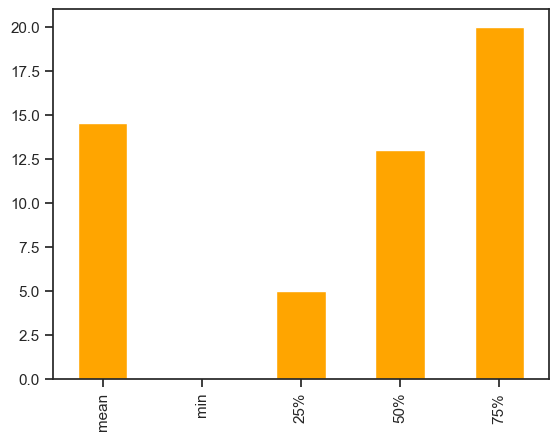

In [72]:
d['price'].iloc[1:6].plot(kind='bar', color="orange")
plt.show()

## Graficando el total de horas jugadas

#### Se puede ver el bajo promedio de horas jugadas y la dispercion la gracias a la desviacion estandar y gracias a os cuartiles que hay un porcentaje mas alto de los que juegan mas horas respecto a los que no gracias a los curtiles

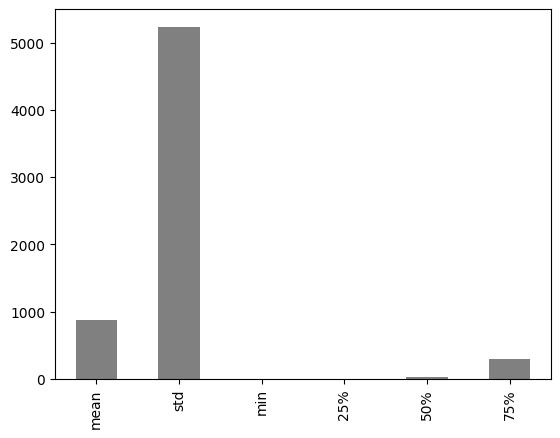

In [10]:
d['playtime_forever'].iloc[1:7].plot(kind='bar', color="gray")
plt.show()

## Detectando nullos, datos vacios y tipo de archivo de las columnas

In [43]:
# Chequeo de nulos
nulos = df.isnull().sum()

    # Chequeo de valores faltantes
faltantes = df.isna().sum()

    # Tipos de datos
tipos_datos = df.dtypes

### En las 2 Graficas siguiente se puede ver donde hay nulos y datos vacios, tambien a que columna pertenecen

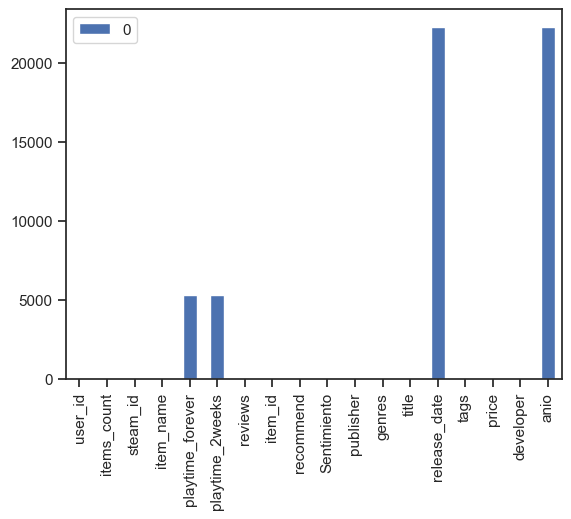

In [38]:
nulos = pd.DataFrame(nulos)
nulos
nulos.plot(kind='bar')
plt.show()

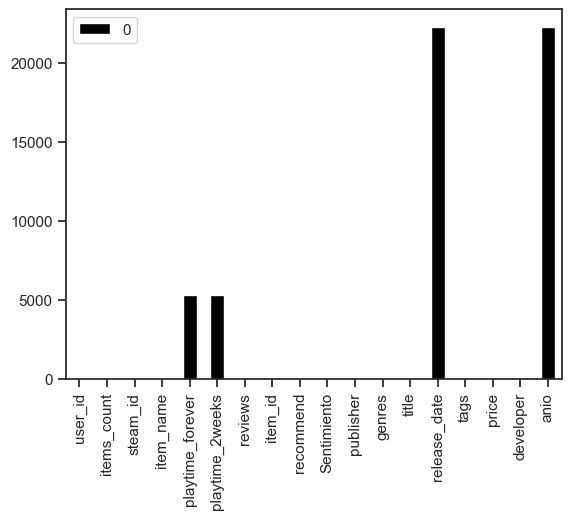

In [46]:
faltantes = pd.DataFrame(faltantes)
nulos
faltantes.plot(kind='bar', color='black')
plt.show()

#### Aqui se puede ver los tipos de datos de las columnas

In [44]:
tipos_datos

user_id                     object
items_count                  int64
steam_id                    object
item_name                   object
playtime_forever           float64
playtime_2weeks            float64
reviews                     object
item_id                    float64
recommend                     bool
Sentimiento                  int64
publisher                   object
genres                      object
title                       object
release_date        datetime64[ns]
tags                        object
price                      float64
developer                   object
anio                       float64
dtype: object

# Mapa de correlacion

Intentare a continuacion realizar un heatmap, buscando algun tipo de relacion directa entre las variables numericas

#### Conclusiones: no hay realmente una correlacion entre los elementos, cada columna pertenece a su propia categoria

In [9]:
df_num= df.select_dtypes(include = (int,float))

<Axes: >

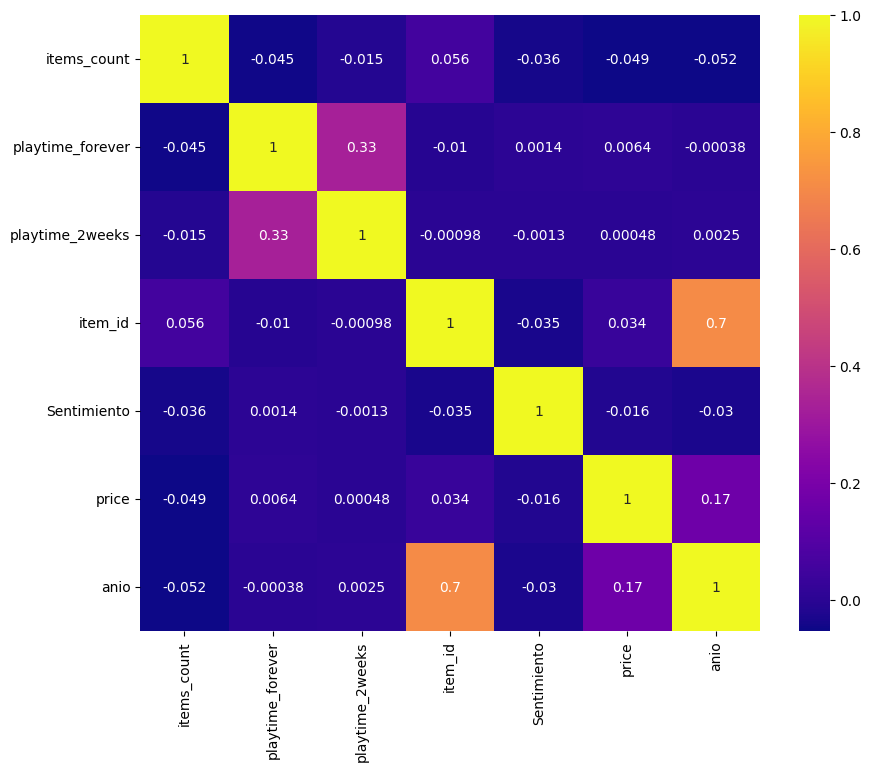

In [10]:
#Creamos una matriz de correlación
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')



# Correlacion Bivariado

#### No se ve una correlacion entre los elementos

<Axes: >

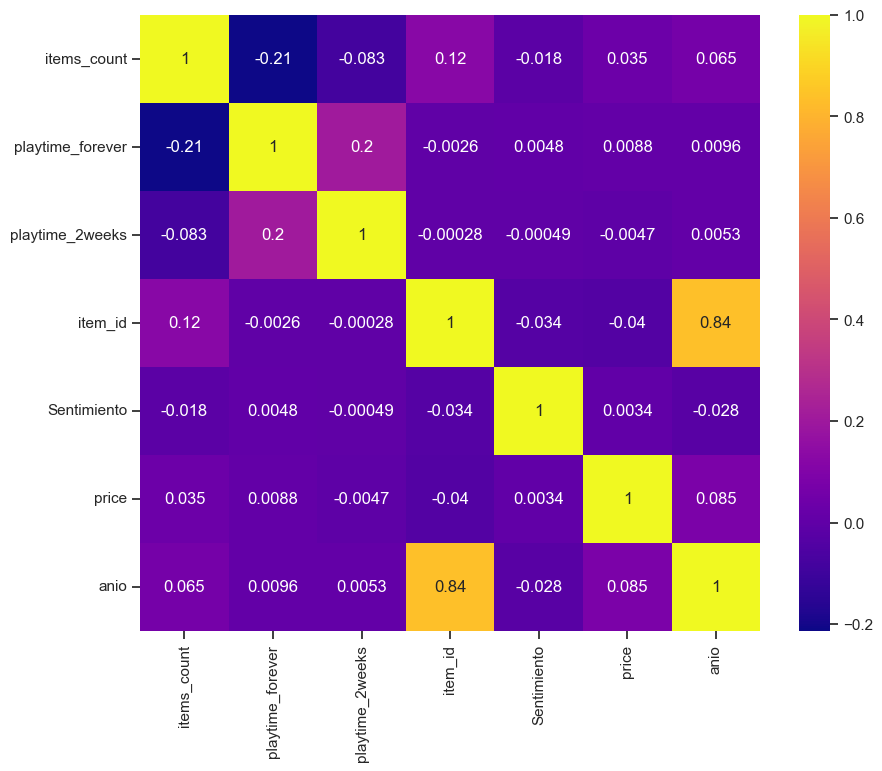

In [74]:
multiv=df_num.corr(method='spearman')
plt.figure(figsize=(10, 8))  
sns.heatmap(multiv, annot=True, cmap='plasma')


# Top juegos que poseen los usuarios



#### Concluciones: El mayor porcentaje lo tienen Counter Strike, Team Fortress, Garry's Mod los cuales serian los juegos mas comprados segun los usuarios


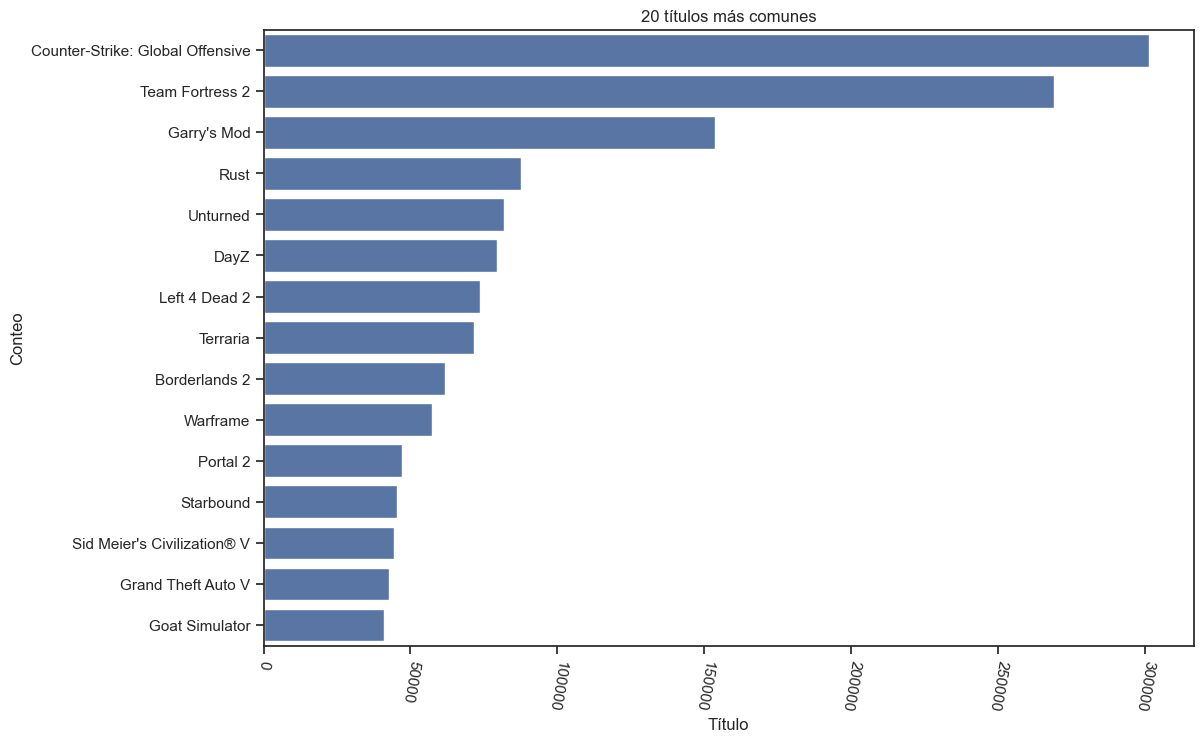

In [78]:
# Obtener los 20 títulos más comunes
top_titles = df['title'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=260)
plt.show()

# Dispersion de horas de juego vs Años

#### Chequeo general para mostrar explicitamente los años que tuvieron la mayor cantidad de horas de juego para cada usuario

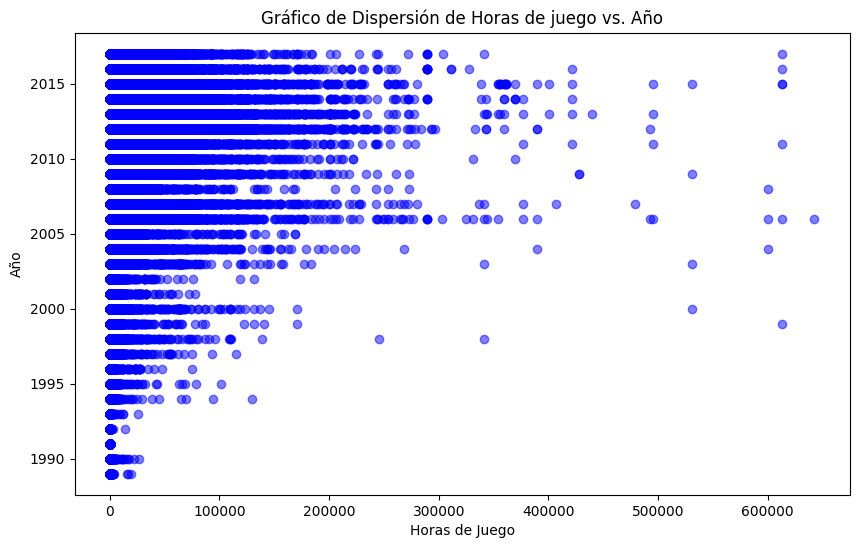

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df_num['playtime_forever'], df_num['anio'], color='blue', alpha=0.5)
# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

# Grafico de Sentiment score por año 

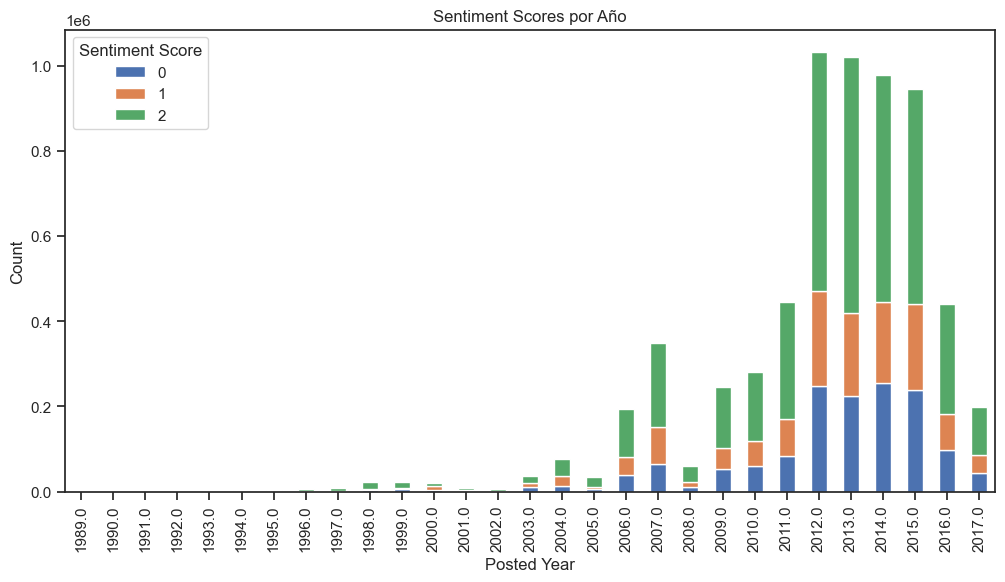

In [77]:
# Group the data by 'posted year' and 'sentiment_score' and count the occurrences
grouped_data = df.groupby(['anio', 'Sentimiento']).size().reset_index(name='count')

# Pivot the data to have 'sentiment_score' as columns
pivot_data = grouped_data.pivot(index='anio', columns='Sentimiento', values='count')

# Plot the grouped data
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Posted Year')
plt.ylabel('Count')
plt.title('Sentiment Scores por Año')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

# Desarrolladores con mas juegos vendidos

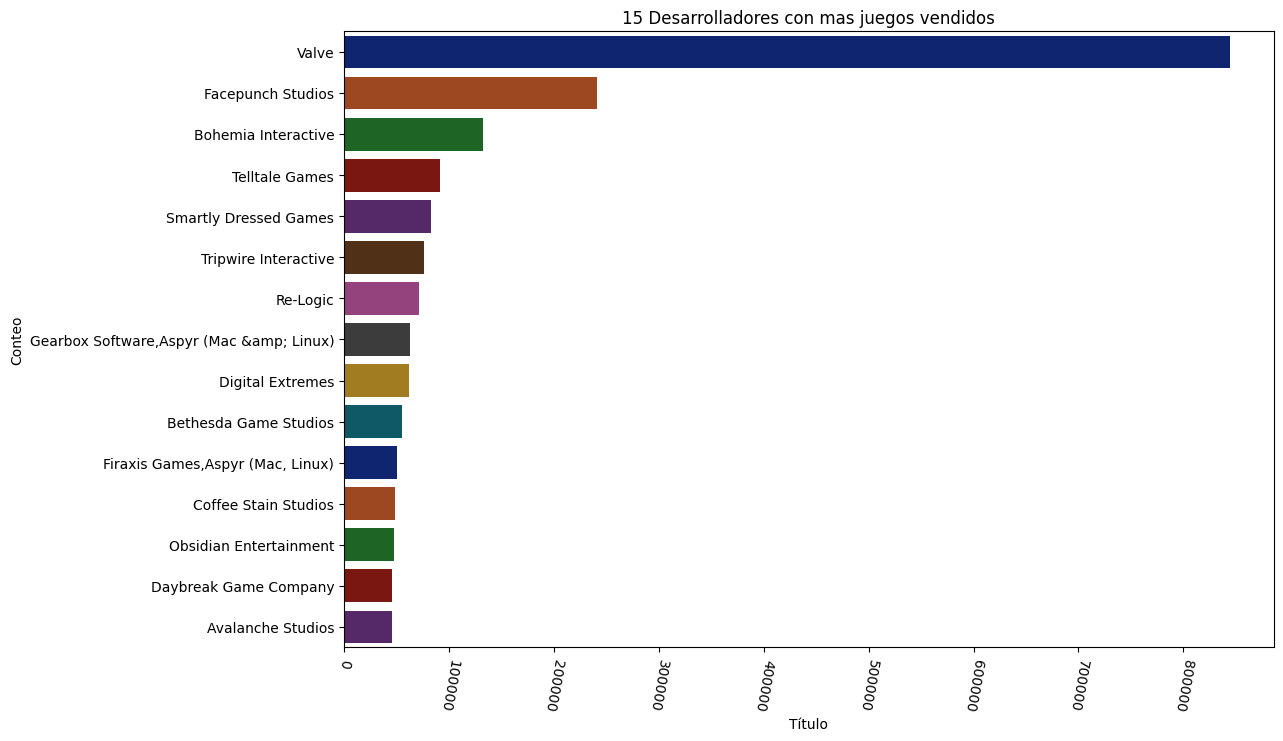

In [17]:
# Obtener los 20 títulos más comunes
developers = df['developer'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=developers.index, x=developers.values, palette="dark")
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('15 Desarrolladores con mas juegos vendidos')
plt.xticks(rotation=260)
plt.show()

# 15 USUARIOS CON MAS JUEGOS

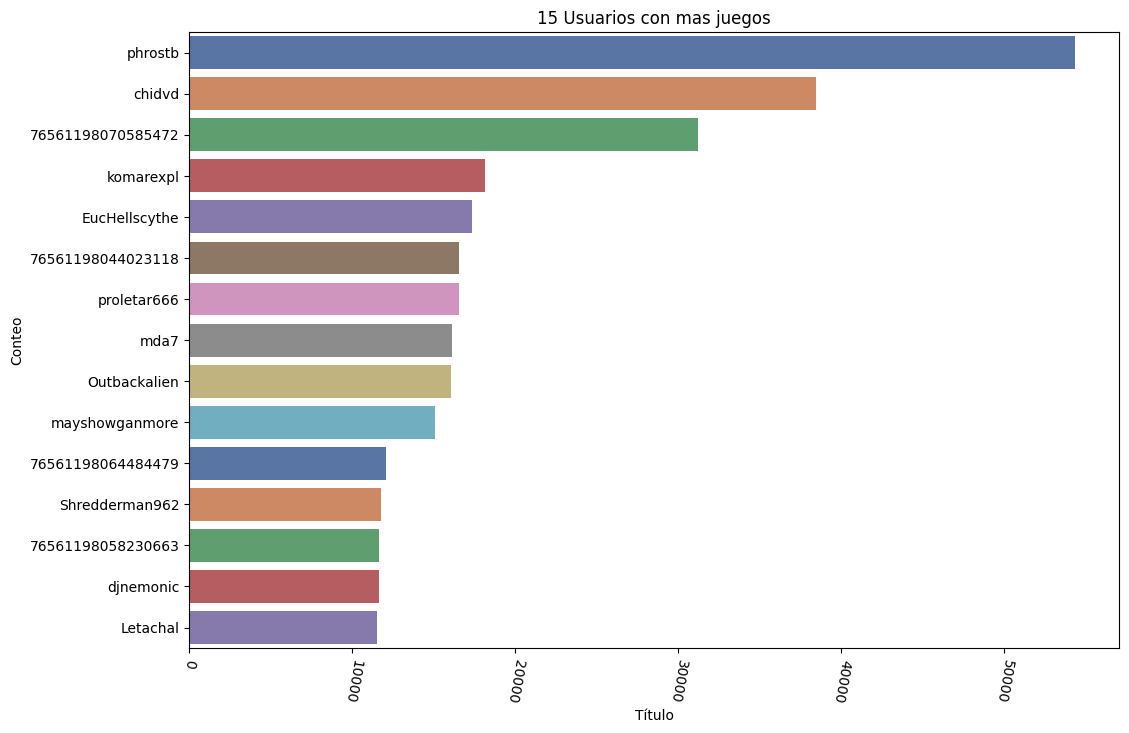

In [18]:
# Obtener los 20 títulos más comunes
developers = df['user_id'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=developers.index, x=developers.values, palette="deep")
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('15 Usuarios con mas juegos')
plt.xticks(rotation=260)
plt.show()